In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("linearX.csv", delimiter=",")
X = data[:]
data = np.loadtxt("linearY.csv", delimiter=",")
Y = data[:]

In [207]:
def robust_scale(array):
    Q1 = np.percentile(array, 25)  # 25th percentile
    Q3 = np.percentile(array, 75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range
    
    return (array - Q1) / IQR  # Robust scaling formula

# Apply robust scaling
X_scaled = robust_scale(X)
Y_scaled = robust_scale(Y)

# Print results
print("\n Original X: ", X)
print("\n Scaled X: ", X_scaled)
print("\n Original Y: ", Y)
print("\n Scaled Y: ", Y_scaled)


 Original X:  [ 9.1  8.   9.1  8.4  6.9  7.7 15.6  7.3  7.   7.2 10.1 11.5  7.1 10.
  8.9  7.9  5.6  6.3  6.7 10.4  8.5  7.4  6.3  5.4  8.9  9.4  7.5 11.9
  7.8  7.4 10.8 10.2  6.2  7.7 13.7  8.   6.7  6.7  7.   8.3  7.4  9.9
  6.1  7.   5.4 10.7  7.6  8.9  9.2  6.6  7.2  8.   7.8  7.9  7.   7.
  7.6  9.1  9.   7.9  6.6 11.9  6.5  7.1  8.8  7.5  7.7  6.  10.6  6.6
  8.2  7.9  7.1  5.6  6.4  7.5  9.8  7.  10.5  7.1  6.2  6.5  7.7  7.2
  9.3  8.5  7.7  6.8  7.8  8.7  9.6  7.2  9.3  8.1  6.6  7.8 10.2  6.1
  7.3  7.3]

 Scaled X:  [ 1.09090909  0.51948052  1.09090909  0.72727273 -0.05194805  0.36363636
  4.46753247  0.15584416  0.          0.1038961   1.61038961  2.33766234
  0.05194805  1.55844156  0.98701299  0.46753247 -0.72727273 -0.36363636
 -0.15584416  1.76623377  0.77922078  0.20779221 -0.36363636 -0.83116883
  0.98701299  1.24675325  0.25974026  2.54545455  0.41558442  0.20779221
  1.97402597  1.66233766 -0.41558442  0.36363636  3.48051948  0.51948052
 -0.15584416 -0.15584416  0

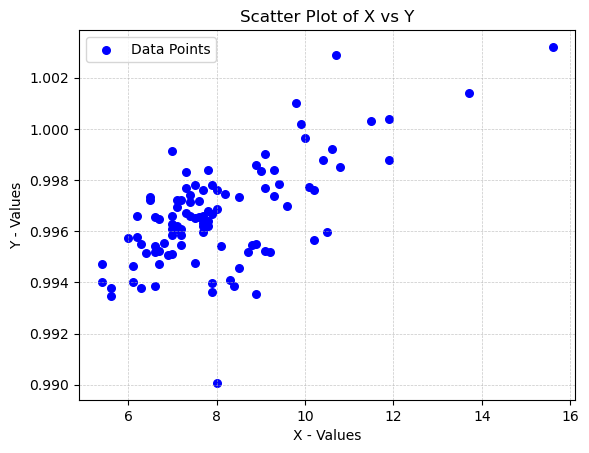

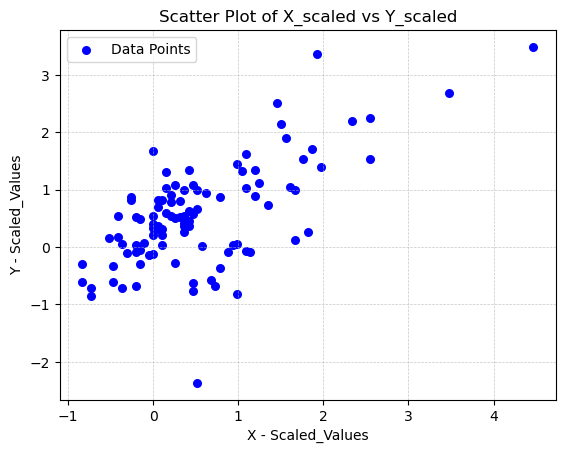

In [209]:
# Plotting Graph for Robust Scaled X and Y Values

plt.scatter(X, Y, color="blue", marker="o", label="Data Points", s=30)
plt.xlabel("X - Values")
plt.ylabel("Y - Values")
plt.title("Scatter Plot of X vs Y")
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.show()

# ----------------------------------------------------------------------------------

# Plotting Graph for Robust Scaled X and Y Values

plt.scatter(X_scaled, Y_scaled, color="blue", marker="o", label="Data Points", s=30)
plt.xlabel("X - Scaled_Values")
plt.ylabel("Y - Scaled_Values")
plt.title("Scatter Plot of X_scaled vs Y_scaled")
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.show()

Converged at iteration 18
Final Cost Function Value: 0.23706108404661363
Optimal Theta_0 (Intercept): 0.1880016034943113
Optimal Theta_1 (Slope): 0.6657115230731107
Equation of Regression Line : 0.188 + 0.6657x


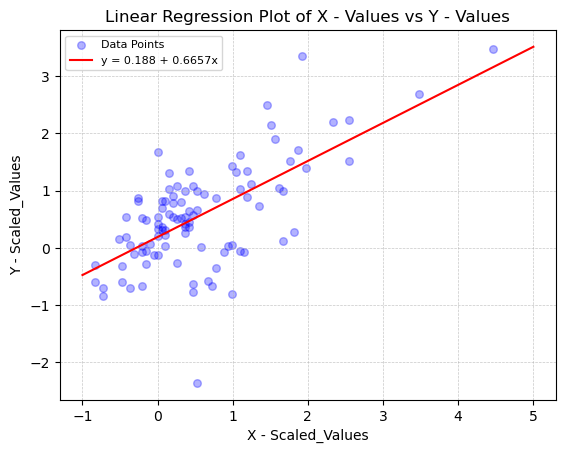

Final Cost Function Value: 0.23706029453895197
Optimal Theta_0 (Intercept): 0.18668479827073034
Optimal Theta_1 (Slope): 0.6669083010894464
Equation of Regression Line : 0.1867 + 0.6669x


In [215]:
def gradient_descent(x, y, alpha, check, tolerance=1e-6, max_iterations=50):
    m = len(y)  # Number of samples
    theta_0, theta_1 = 0, 0  # Initialize parameters
    cost_history = []  # Store cost values
    prev_cost = float("inf")  # Initialize previous cost

    for i in range(max_iterations):
        y_pred = theta_0 + theta_1 * x  # Hypothesis function
        error = y_pred - y  # Compute error

        # Compute cost (Mean Squared Error)
        cost = (1 / (2 * m)) * np.sum(error ** 2)
        cost_history.append(cost)

        # Check for convergence (if cost change is small)
        if check and abs(prev_cost - cost) < tolerance:
            print(f"Converged at iteration {i}")
            break

        prev_cost = cost  # Update previous cost

        # Compute gradients
        d_theta_0 = (1/m) * np.sum(error)
        d_theta_1 = (1/m) * np.sum(error * x)

        # Update parameters
        theta_0 -= alpha * d_theta_0
        theta_1 -= alpha * d_theta_1

    return theta_0, theta_1, cost, cost_history

# Run Gradient Descent
theta_0, theta_1, final_cost, cost_history = gradient_descent(X_scaled, Y_scaled, alpha=0.5, check=True)

# Print final results
print(f"Final Cost Function Value: {final_cost}")
print(f"Optimal Theta_0 (Intercept): {theta_0}")
print(f"Optimal Theta_1 (Slope): {theta_1}")
print(f"Equation of Regression Line : {round(theta_0, 4)} + {round(theta_1, 4)}x")

plt.scatter(X_scaled, Y_scaled, color="blue", marker='o', label="Data Points", s=30, alpha=0.3)
a = np.linspace(-1, 5, 50)
b = theta_1 * a + theta_0
plt.plot(a, b, label=f"y = {round(theta_0, 4)} + {round(theta_1, 4)}x", color='r')
plt.xlabel("X - Scaled_Values")
plt.ylabel("Y - Scaled_Values")
plt.title("Linear Regression Plot of X - Values vs Y - Values")
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.legend(loc="upper left", prop={'size': 8})
plt.show()

theta_0, theta_1, final_cost, cost_history = gradient_descent(X_scaled, Y_scaled, alpha=0.5, check=False)

print(f"Final Cost Function Value: {final_cost}")
print(f"Optimal Theta_0 (Intercept): {theta_0}")
print(f"Optimal Theta_1 (Slope): {theta_1}")
print(f"Equation of Regression Line : {round(theta_0, 4)} + {round(theta_1, 4)}x")

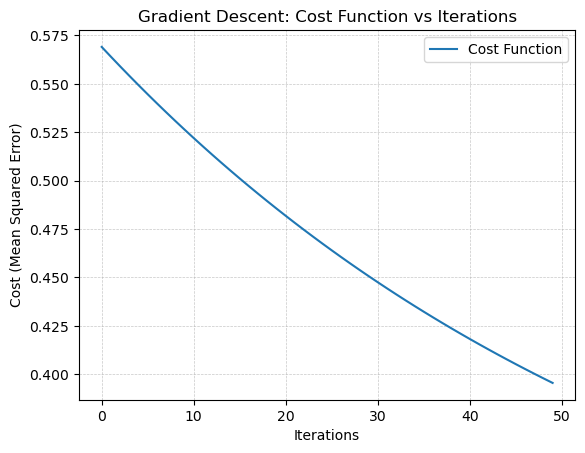

In [203]:
# Plot Cost Function vs Iterations (Lr = 0.005)
theta_0, theta_1, final_cost, cost_history = gradient_descent(X_scaled, Y_scaled, alpha=0.005, check=False)

plt.plot(range(len(cost_history)), cost_history, label="Cost Function")
plt.xlabel("Iterations")
plt.ylabel("Cost (Mean Squared Error)")
plt.title("Gradient Descent: Cost Function vs Iterations")
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.show()

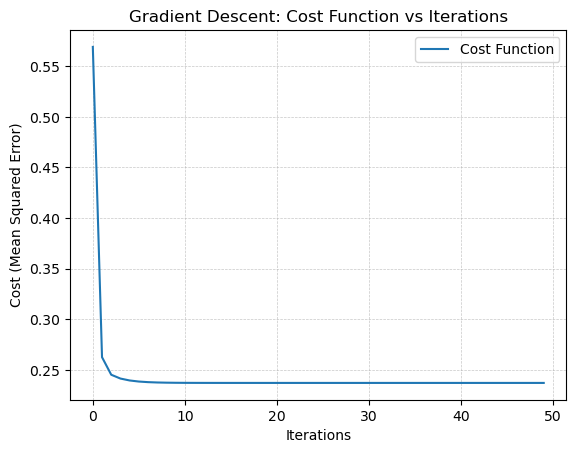

In [214]:
# Plot Cost Function vs Iterations (Lr = 0.5)
theta_0, theta_1, final_cost, cost_history = gradient_descent(X_scaled, Y_scaled, alpha=0.5, check=False)

plt.plot(range(len(cost_history)), cost_history, label="Cost Function")
plt.xlabel("Iterations")
plt.ylabel("Cost (Mean Squared Error)")
plt.title("Gradient Descent: Cost Function vs Iterations")
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.show()

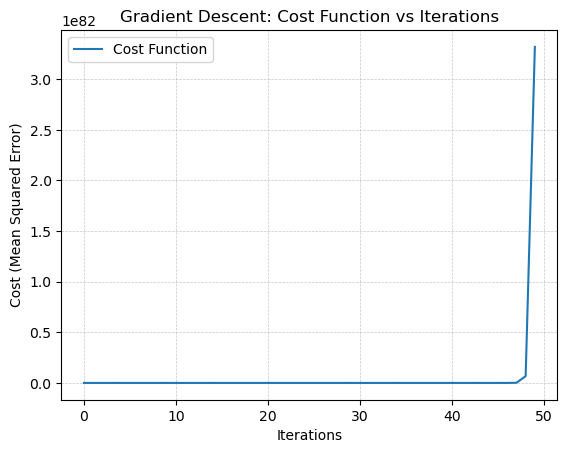

In [212]:
# Plot Cost Function vs Iterations (Lr = 5)
theta_0, theta_1, final_cost, cost_history = gradient_descent(X_scaled, Y_scaled, alpha=5, check=False)

plt.plot(range(len(cost_history)), cost_history, label="Cost Function")
plt.xlabel("Iterations")
plt.ylabel("Cost (Mean Squared Error)")
plt.title("Gradient Descent: Cost Function vs Iterations")
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.show()

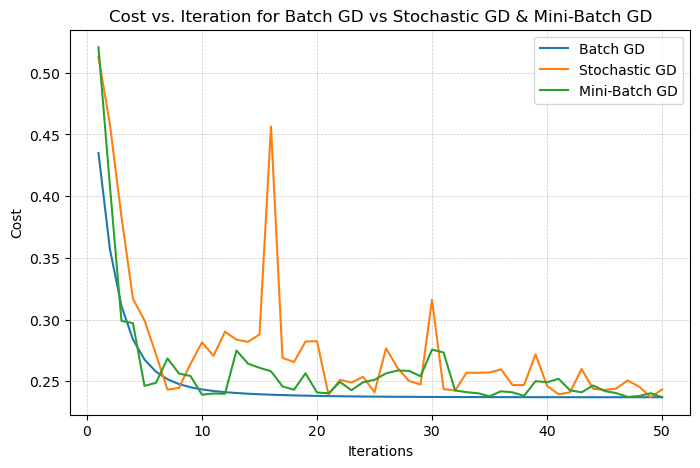

In [217]:
# Function to compute cost
def compute_cost(X, Y, theta_0, theta_1):
    """Computes mean squared error cost."""
    m = len(Y)
    return np.sum((theta_0 + theta_1 * X - Y) ** 2) / (2 * m)

# Batch Gradient Descent
def batch_gradient_descent(X, Y, alpha=0.15, max_iterations=50):
    """Batch GD - Updates using the entire dataset per iteration."""
    theta_0, theta_1 = 0, 0  # Initialize parameters
    cost_history = []

    for _ in range(max_iterations):
        # Compute error
        error = (theta_0 + theta_1 * X) - Y
        d_theta_0 = np.mean(error)
        d_theta_1 = np.mean(error * X)

        # Update parameters
        theta_0 -= alpha * d_theta_0
        theta_1 -= alpha * d_theta_1

        cost_history.append(compute_cost(X, Y, theta_0, theta_1))

    return theta_0, theta_1, cost_history

# Stochastic Gradient Descent
def stochastic_gradient_descent(X, Y, alpha=0.15, max_iterations=50):
    """SGD - Updates using one random sample per iteration."""
    theta_0, theta_1 = 0, 0  # Initialize parameters
    cost_history = []

    for _ in range(max_iterations):
        idx = random.randint(0, len(Y) - 1)  # Pick a random data point
        x_i, y_i = X[idx], Y[idx]

        # Compute error and update parameters
        error = (theta_0 + theta_1 * x_i) - y_i
        theta_0 -= alpha * error
        theta_1 -= alpha * error * x_i

        cost_history.append(compute_cost(X, Y, theta_0, theta_1))

    return theta_0, theta_1, cost_history

# Mini-Batch Gradient Descent
def mini_batch_gradient_descent(X, Y, batch_size=3, alpha=0.15, max_iterations=50):
    """Mini-Batch GD - Updates using a small batch per iteration."""
    theta_0, theta_1 = 0, 0  # Initialize parameters
    cost_history = []

    for _ in range(max_iterations):
        batch_indices = random.sample(range(len(Y)), batch_size)  # Random batch
        batch_X, batch_Y = X[batch_indices], Y[batch_indices]

        # Compute gradients
        error = (theta_0 + theta_1 * batch_X) - batch_Y
        d_theta_0 = np.mean(error)
        d_theta_1 = np.mean(error * batch_X)

        # Update parameters
        theta_0 -= alpha * d_theta_0
        theta_1 -= alpha * d_theta_1

        cost_history.append(compute_cost(X, Y, theta_0, theta_1))

    return theta_0, theta_1, cost_history

# Run gradient descent methods
_, _, cost_bgd = batch_gradient_descent(X_scaled, Y_scaled, alpha=0.15)
_, _, cost_sgd = stochastic_gradient_descent(X_scaled, Y_scaled, alpha=0.15)
_, _, cost_mbgd = mini_batch_gradient_descent(X_scaled, Y_scaled, batch_size=3, alpha=0.15)

# Plot cost vs. iteration
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cost_bgd) + 1), cost_bgd, label="Batch GD", linestyle="-")
plt.plot(range(1, len(cost_sgd) + 1), cost_sgd, label="Stochastic GD", linestyle="-")
plt.plot(range(1, len(cost_mbgd) + 1), cost_mbgd, label="Mini-Batch GD", linestyle="-")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs. Iteration for Batch GD vs Stochastic GD & Mini-Batch GD")
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.show()
